In [ ]:
!git clone https://github.com/stopwords/vietnamese-stopwords.git

https://github.com/undertheseanlp/underthesea

In [ ]:
! pip install underthesea

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import nltk
import re
import string
# from imblearn.over_sampling import SMOTE

from underthesea import word_tokenize, text_normalize, sentiment
# from underthesea.corpus import stopwords # I cant use this package

# from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset /Natural Language Processing/Sentiment Analysis/data_vn.csv')
print('Shape dataset:',df.shape)
df.head()

Shape dataset: (31460, 4)


,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  31460 non-null  object
 1   label    31460 non-null  object
 2   rate     31460 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 737.5+ KB


In [ ]:
df.isnull().sum()

comment           0
label             0
rate              0
Unnamed: 3    31437
dtype: int64

In [ ]:
df = df.dropna(axis = 1)

In [ ]:
count_rate = df['rate'].value_counts().sort_index()
count_rate

1     3529
2     3140
3     4698
4     6807
5    13286
Name: rate, dtype: int64

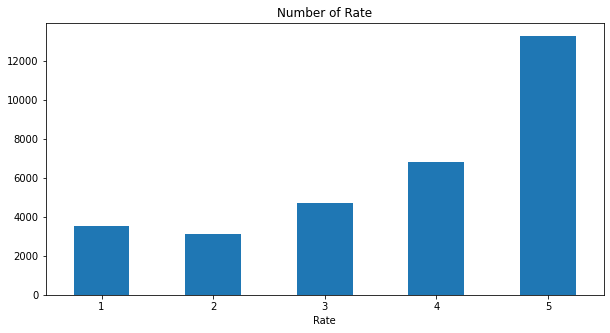

In [ ]:
ax = count_rate.plot(kind = 'bar', title= 'Number of Rate', figsize = (10,5))
ax.set_xlabel('Rate')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

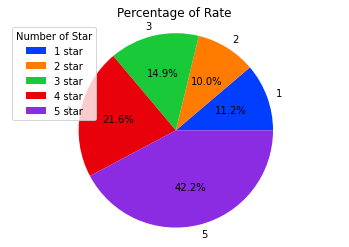

In [ ]:
plt.pie(count_rate, labels = ['1','2','3','4','5'], colors = sns.color_palette('bright')[0:], autopct='%1.1f%%', radius = 2)
plt.title('Percentage of Rate')
plt.legend(loc = 'upper left', labels = ['1 star','2 star','3 star','4 star','5 star'], title = 'Number of Star')
plt.axis('equal')
plt.show()

In [ ]:
def create_stopwordlist():
    f = open('/content/vietnamese-stopwords/vietnamese-stopwords.txt', "r", encoding='utf-8')
    stop_words_list = []
    null_data = []
    for i, line in enumerate(f):
        line = repr(line)
        line = line[1:len(line)-3]
        stop_words_list.append(line)
    return stop_words_list

In [ ]:
stopword_vn = create_stopwordlist()
print(stopword_vn)

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [ ]:
# Perform sentiment analysis on the preprocessed data
df['sentiment'] = df['comment'].apply(sentiment)

2023-03-08 13:01:31,586 https://github.com/undertheseanlp/playground/releases/download/1.3.x/sa_svm_vlsp2016-sa_20210107.zip not found in cache, downloading to /tmp/tmp41oky5tg


100%|██████████| 2234880/2234880 [00:00<00:00, 8634959.03B/s]

2023-03-08 13:01:32,274 copying /tmp/tmp41oky5tg to cache at /root/.underthesea/models/sa_svm_vlsp2016-sa_20210107.zip
2023-03-08 13:01:32,295 removing temp file /tmp/tmp41oky5tg


# Preprocessing Data

In [ ]:
def Preprocess_text(text, stop_word):
    # Remove the HTML tags and URLs
    text = text.apply(lambda x: BeautifulSoup(x).get_text())
    text = text.apply(lambda x: re.sub(r'http\S+', '', x))
    # Remove punctuations 
    remove_punc = str.maketrans('', '', string.punctuation)
    text = text.apply(lambda x: "".join([word.translate(remove_punc) for word in x]))
    # Remove extra spaces between words
    text = text.apply(lambda x: re.sub(' +',' ',x))
    # Convert all Text into lower case
    text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    # tokenization
    text = text.apply(lambda x: word_tokenize(x))
    # Remove the stopwords
    text = text.apply(lambda x: [word for word in x if word not in stop_word])
    # Normalization
    text = text.apply(lambda x: [text_normalize(word) for word in x])

    text = text.apply(lambda x: " ".join(x))
    return text

In [ ]:
df['preprocess'] = Preprocess_text(df['comment'], stopword_vn)
df.head()

/usr/local/lib/python3.9/dist-packages/bs4/__init__.py:270: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,comment,label,rate,preprocess
0,Áo bao đẹp ạ!!,POS,5,áo bao đẹp
1,Tuyệt vời !,POS,5,tuyệt vời
2,2day ao khong giong trong.,NEG,1,2 day ao khong giong
3,"Mùi thơm,bôi lên da mềm da.",POS,5,mùi thơmbôi lên da mềm da
4,"Vải đẹp, dày dặn.",POS,5,vải đẹp dày dặn


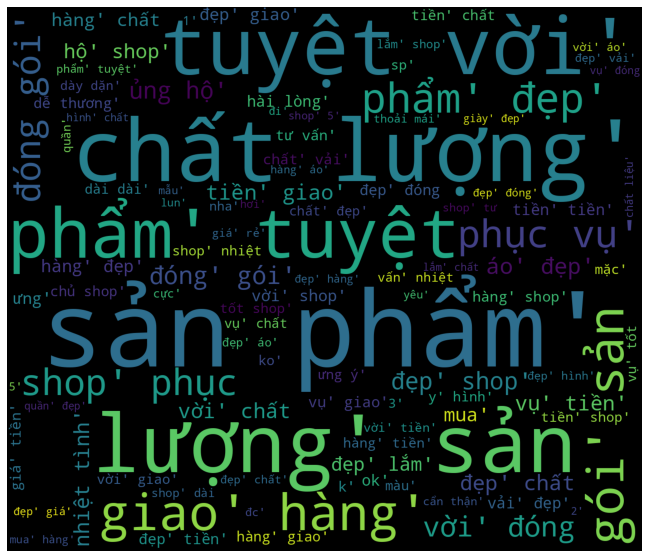

In [ ]:
from wordcloud import WordCloud 
w_cloud = ' '.join(word for word in df['preprocess'][df['rate']==5].astype(str))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(w_cloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

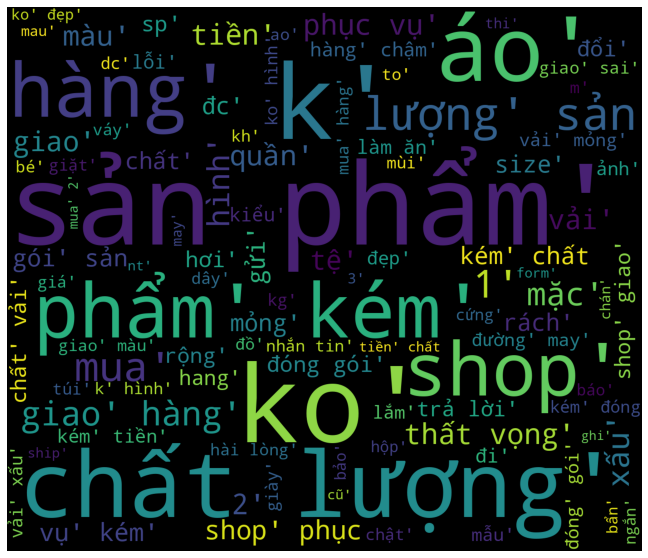

In [ ]:
w_cloud = ' '.join(word for word in df['preprocess'][df['rate']==1].astype(str))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(w_cloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df['preprocess'],df['rate'], test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25168,), (6292,), (25168,), (6292,))

In [ ]:
tf_idf_vectorizer =  TfidfVectorizer()
tf_x_train = tf_idf_vectorizer.fit_transform(X_train)
tf_x_test = tf_idf_vectorizer.transform(X_test)

In [ ]:
LogR_model = LogisticRegression(random_state = 42)
LogR_model.fit(tf_x_train, y_train)

y_test_predicted = LogR_model.predict(tf_x_test)

              precision    recall  f1-score   support

           1       0.55      0.53      0.54       707
           2       0.34      0.29      0.31       626
           3       0.37      0.30      0.33       978
           4       0.34      0.20      0.25      1335
           5       0.63      0.83      0.72      2646

    accuracy                           0.53      6292
   macro avg       0.45      0.43      0.43      6292
weighted avg       0.49      0.53      0.50      6292



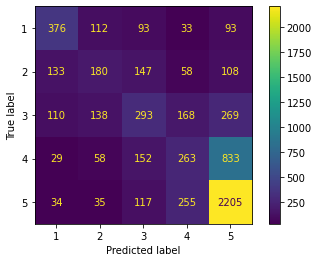

In [ ]:
report = metrics.classification_report(y_test, y_test_predicted)
print(report)
cm = metrics.confusion_matrix(y_test,y_test_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =  ['1','2','3','4','5'])
cm_display.plot()
plt.show()

# Build LSTM model

## Tokenization and Padding

In [ ]:
category = df['rate'].unique()
category_to_id = {cate: idx for idx, cate in enumerate(category)}
id_to_category = {idx: cate for idx, cate in enumerate(category)}
print(category_to_id)
print(id_to_category)

{5: 0, 1: 1, 4: 2, 2: 3, 3: 4}
{0: 5, 1: 1, 2: 4, 3: 2, 4: 3}


In [ ]:
df.preprocess.map(lambda x: len(x)).max()

296

In [ ]:
Vocab_size = 1000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=Vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['preprocess'].values)

In [ ]:
train_text = tokenizer.texts_to_sequences(df['preprocess'].values)
train_text = pad_sequences(train_text, maxlen=MAX_SEQUENCE_LENGTH, padding = 'post')
print('Shape of data tensor:', train_text.shape)
print(train_text)

Shape of data tensor: (31460, 250)
[[ 10 158   4 ...   0   0   0]
 [ 11  12   0 ...   0   0   0]
 [ 44 612 144 ...   0   0   0]
 ...
 [  7   4  27 ...   0   0   0]
 [  5  16  60 ...   0   0   0]
 [ 10  28  16 ...   0   0   0]]


## Split data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train_text,df['rate'], test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25168, 250), (6292, 250), (25168,), (6292,))

In [ ]:
y_ = y_train.map(category_to_id).values
y_train = np.zeros((len(y_), y_.max()+1))
y_train[np.arange(len(y_)), y_] = 1
# y_train = y_

y_ = y_test.map(category_to_id).values
y_test = np.zeros((len(y_), y_.max()+1))
y_test[np.arange(len(y_)), y_] = 1
# y_test = y_
print(y_train.shape, y_test.shape)

(25168, 5) (6292, 5)


## LSTM model

In [ ]:
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, Flatten
from tensorflow.keras.layers import Bidirectional, SpatialDropout1D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Embedding(Vocab_size, EMBEDDING_DIM, input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(256, dropout = 0.2, recurrent_dropout = 0.2)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 100)          100000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              731136    
 nal)                                                            
                                                                 
 dense_26 (Dense)            (None, 128)               65664     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 5)               

In [ ]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=5,  min_delta=0.0001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, min_lr=1e6)
checkpoint = ModelCheckpoint('best_full.h5', monitor='val_loss',
                             verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split = 0.1, verbose = 1,
                    callbacks=[es, reduce_lr, checkpoint])

Epoch 1/20
354/354 [==============================] - 2353s 7s/step - loss: 1.1965 - accuracy: 0.4866 - val_loss: 1.0710 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 2/20
354/354 [==============================] - 2366s 7s/step - loss: 1.0796 - accuracy: 0.5388 - val_loss: 1.0235 - val_accuracy: 0.5673 - lr: 0.0010
Epoch 3/20
354/354 [==============================] - 2343s 7s/step - loss: 1.0425 - accuracy: 0.5549 - val_loss: 1.0137 - val_accuracy: 0.5622 - lr: 0.0010
Epoch 4/20
354/354 [==============================] - 2338s 7s/step - loss: 1.0232 - accuracy: 0.5614 - val_loss: 1.0169 - val_accuracy: 0.5606 - lr: 0.0010
Epoch 5/20
354/354 [==============================] - 2320s 7s/step - loss: 1.0067 - accuracy: 0.5685 - val_loss: 1.0134 - val_accuracy: 0.5701 - lr: 0.0010
Epoch 6/20
354/354 [==============================] - 2316s 7s/step - loss: 0.9934 - accuracy: 0.5778 - val_loss: 1.0236 - val_accuracy: 0.5618 - lr: 0.0010
Epoch 7/20
354/354 [==============================] - 2290

# Evaluation

In [ ]:
model.evaluate(X_test,y_test)

197/197 [==============================] - 160s 813ms/step - loss: 1.0762 - accuracy: 0.5378


[1.076190710067749, 0.5378258228302002]

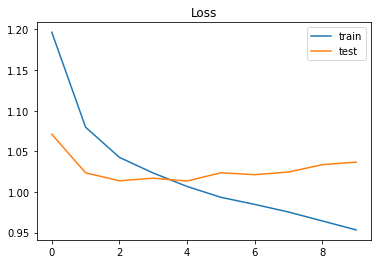

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

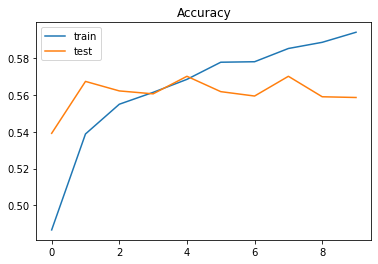

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

In [ ]:
y_test_predicted = model.predict(X_test)

197/197 [==============================] - 158s 791ms/step


In [ ]:
compare_df = pd.DataFrame(data = list(zip(y_test, y_test_predicted)), columns = ['Actual','Predicted'])
compare_df

,Actual,Predicted
0,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.24715924, 0.010151028, 0.44121316, 0.034750..."
1,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.9575496, 0.0021944973, 0.031879935, 0.00072..."
2,"[0.0, 0.0, 0.0, 1.0, 0.0]","[0.023246584, 0.013220032, 0.2561361, 0.136284..."
3,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.77598816, 0.0026507983, 0.19489196, 0.00229..."
4,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.59255576, 0.005209828, 0.34164584, 0.007790..."
...,...,...
6287,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.47308925, 0.01465167, 0.37910274, 0.0205986..."
6288,"[0.0, 0.0, 1.0, 0.0, 0.0]","[0.22983542, 0.010067286, 0.4676725, 0.0445857..."
6289,"[0.0, 0.0, 0.0, 1.0, 0.0]","[0.00072118733, 0.8871471, 0.0007257701, 0.106..."
6290,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.019625887, 0.3504982, 0.040147122, 0.396244..."


In [ ]:
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(df['preprocess'],df['rate'], test_size = 0.2, random_state = 42, shuffle = True)
print(X_train_text.shape,y_train_text.shape)
print(X_test_text.shape,y_test_text.shape)

(25168,) (25168,)
(6292,) (6292,)


In [ ]:
X_test_temp_df = pd.DataFrame(X_test_text)
X_test_temp_df = X_test_temp_df.reset_index(drop=True)

# set a new index starting with 0
X_test_temp_df = X_test_temp_df.set_index(pd.Index(range(len(X_test_temp_df))))

In [ ]:
compare_df['Actual'] = compare_df['Actual'].apply(lambda x: np.argmax(x) + 1)
compare_df['Predicted'] = compare_df['Predicted'].apply(lambda x: np.argmax(x) + 1)

In [ ]:
compare_df = pd.concat([compare_df,X_test_temp_df], axis = 1)

In [ ]:
compare_df.head()

,Actual,Predicted,preprocess
0,1,3,máy chụp ok
1,1,1,chất lượng sản phẩm tuyệt vời đóng gói sản phẩ...
2,4,5,chất lượng tam duoc
3,1,1,hang rât tôt ủng hộ dài dài
4,1,1,vải đẹp


Text(0.5, 51.0, 'Predicted')

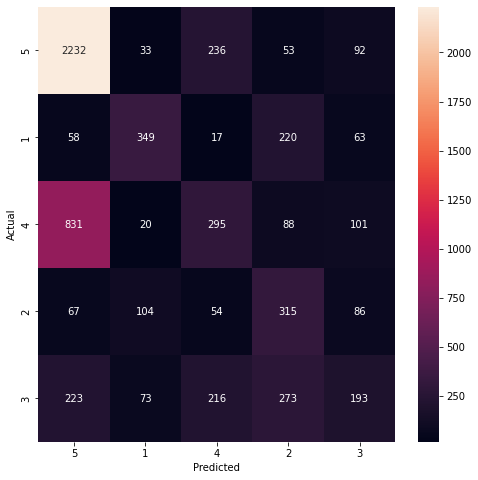

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
conf_mat = confusion_matrix(compare_df['Actual'], compare_df['Predicted'])
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=id_to_category.values(), yticklabels=id_to_category.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')

# The end